In [1]:
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
csv_1 = pd.read_csv(r"C:\Users\data science\CICIDS - 30 neurons\with attention and dimensionality reduction\attentionnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_1.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                       
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_1.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 


csv_1.to_csv("attentionnormalresult.csv", index=None)

In [3]:
csv_2 = pd.read_csv(r"C:\Users\data science\CICIDS - 30 neurons\50% attack\attentionabnormalresult.csv") 
  
# changing cols with rename() 
new_data = csv_2.rename(columns = {0: "Feature1",
                                  1: "Feature2", 
                                  2: "Feature3", 
                                  3: "Feature4",
                                  4: "Feature5",
                                  5: "Feature6",
                                  6: "Feature7",
                                  7: "Feature8",
                                  8: "Feature9",
                                  9: "Feature10",
                                  10: "Feature11",
                                  11: "Feature12",
                                  12: "Feature13",
                                  13: "Feature14",
                                  14: "Feature15",
                                  15: "Feature16",
                                  16: "Feature17",
                                  17: "Feature18",
                                  18: "Feature19", 
                                  19: "Feature20",
                                  20: "Feature21",                                   
                                  21: "Feature22",
                                  22: "Feature23",
                                  23: "Feature24",                                   
                                  24: "Feature25",
                                  25: "Feature26",  
                                  26: "Feature27",
                                  27: "Feature28",
                                  28: "Feature29",
                                  29: "Feature30",                                         
                                  30: "Label"}) 
  
# changing columns using .columns() 
csv_2.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 
                'Feature5', 'Feature6', 'Feature7', 'Feature8',
                 'Feature9', 'Feature10', 'Feature11', 'Feature12',
                 'Feature13', 'Feature14', 'Feature15', 'Feature16',
                 'Feature17', 'Feature18', 'Feature19', 'Feature20','Feature21','Feature22','Feature23','Feature24','Feature25','Feature26','Feature27','Feature28','Feature29','Feature30',"Label"] 

  

csv_2.to_csv("attentionabnormalresult.csv", index=None)

In [4]:
merged = csv_1.merge(csv_2,on="Label")

merged.to_csv("attention1.csv", index=False)
#result = pd.concat([csv_1, csv_2], axis=1)
out = csv_1.append(csv_2)
print(out)
out.to_csv("attention1.csv", index=False)

        Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
0       0.031837  0.031837  0.031837  0.031837  0.036238  0.039322  0.031837   
1       0.035108  0.032130  0.032130  0.032130  0.032130  0.032130  0.038547   
2       0.031934  0.041154  0.031934  0.031934  0.039751  0.031934  0.036542   
3       0.031406  0.032686  0.031092  0.033183  0.037234  0.036711  0.030824   
4       0.031504  0.031599  0.031504  0.032908  0.037345  0.037925  0.031504   
...          ...       ...       ...       ...       ...       ...       ...   
278272  0.037091  0.038374  0.031634  0.031634  0.039445  0.031634  0.034333   
278273  0.033168  0.035719  0.031302  0.033663  0.031302  0.031302  0.031302   
278274  0.031824  0.034175  0.031824  0.031824  0.031824  0.031824  0.034199   
278275  0.040111  0.036553  0.031417  0.031417  0.038181  0.031417  0.033243   
278276  0.038973  0.036329  0.031564  0.031564  0.037975  0.031564  0.033261   

        Feature8  Feature9  Feature10  

In [5]:
df = pd.read_csv("attention1.csv",sep=",", index_col=None)

In [6]:
X=df.drop(['Label'], axis=1).values 
y=df['Label'].values

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(X,y,train_size=0.70, random_state=2)
print(len(x_train), "Training sequences",x_train.shape)
print(len(x_val), "Validation sequences",x_val.shape)
print(len(y_train), "Training sequences",y_train.shape)

1784716 Training sequences (1784716, 30)
764879 Validation sequences (764879, 30)
1784716 Training sequences (1784716,)


In [8]:

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [11]:
import time, datetime

start = datetime.datetime.now()
time.sleep(10)

Epoch 1/20
191220/191220 [==============================] - 160s 834us/step - loss: 0.1510 - accuracy: 0.9403 - val_loss: 0.1177 - val_accuracy: 0.9536
Epoch 2/20
191220/191220 [==============================] - 162s 848us/step - loss: 0.1045 - accuracy: 0.9595 - val_loss: 0.0963 - val_accuracy: 0.9573
Epoch 3/20
191220/191220 [==============================] - 158s 825us/step - loss: 0.0983 - accuracy: 0.9621 - val_loss: 0.0892 - val_accuracy: 0.9702
Epoch 4/20
191220/191220 [==============================] - 158s 825us/step - loss: 0.0953 - accuracy: 0.9630 - val_loss: 0.0907 - val_accuracy: 0.9675
Epoch 5/20
191220/191220 [==============================] - 156s 814us/step - loss: 0.0917 - accuracy: 0.9640 - val_loss: 0.0849 - val_accuracy: 0.9681
Epoch 6/20
191220/191220 [==============================] - 155s 810us/step - loss: 0.0876 - accuracy: 0.9653 - val_loss: 0.0894 - val_accuracy: 0.9580
Epoch 7/20
191220/191220 [==============================] - 156s 817us/step - loss: 0.08

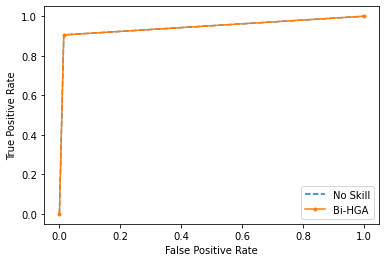

[0 0 0 ... 1 1 1]


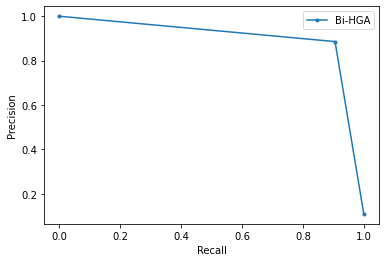

Epoch 1/20
191220/191220 [==============================] - 156s 818us/step - loss: 0.0638 - accuracy: 0.9733 - val_loss: 0.0566 - val_accuracy: 0.9793
Epoch 2/20
191220/191220 [==============================] - 155s 810us/step - loss: 0.0632 - accuracy: 0.9735 - val_loss: 0.0603 - val_accuracy: 0.9755
Epoch 3/20
191220/191220 [==============================] - 161s 844us/step - loss: 0.0625 - accuracy: 0.9739 - val_loss: 0.0591 - val_accuracy: 0.9766
Epoch 4/20
191220/191220 [==============================] - 155s 811us/step - loss: 0.0618 - accuracy: 0.9742 - val_loss: 0.0771 - val_accuracy: 0.9611
Epoch 5/20
191220/191220 [==============================] - 152s 792us/step - loss: 0.0613 - accuracy: 0.9743 - val_loss: 0.0583 - val_accuracy: 0.9756
Epoch 6/20
191220/191220 [==============================] - 160s 835us/step - loss: 0.0609 - accuracy: 0.9743 - val_loss: 0.0645 - val_accuracy: 0.9651
Epoch 7/20
191220/191220 [==============================] - 153s 801us/step - loss: 0.06

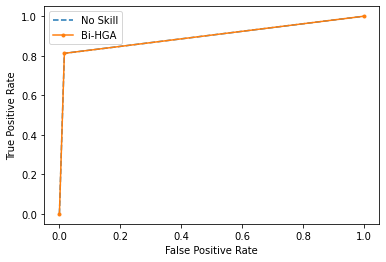

[0 0 0 ... 1 1 1]


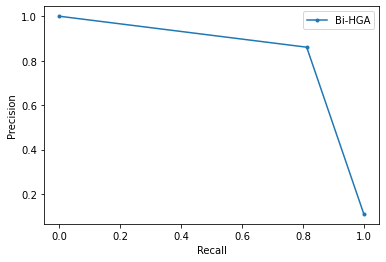

Epoch 1/20
191220/191220 [==============================] - 158s 823us/step - loss: 0.0547 - accuracy: 0.9767 - val_loss: 0.0681 - val_accuracy: 0.9644
Epoch 2/20
191220/191220 [==============================] - 158s 827us/step - loss: 0.0544 - accuracy: 0.9767 - val_loss: 0.0521 - val_accuracy: 0.9793
Epoch 3/20
191220/191220 [==============================] - 156s 818us/step - loss: 0.0542 - accuracy: 0.9768 - val_loss: 0.0503 - val_accuracy: 0.9766
Epoch 4/20
191220/191220 [==============================] - 156s 818us/step - loss: 0.0540 - accuracy: 0.9769 - val_loss: 0.0550 - val_accuracy: 0.9686
Epoch 5/20
191220/191220 [==============================] - 156s 814us/step - loss: 0.0537 - accuracy: 0.9770 - val_loss: 0.0522 - val_accuracy: 0.9788
Epoch 6/20
191220/191220 [==============================] - 160s 837us/step - loss: 0.0536 - accuracy: 0.9771 - val_loss: 0.0615 - val_accuracy: 0.9750
Epoch 7/20
191220/191220 [==============================] - 163s 854us/step - loss: 0.05

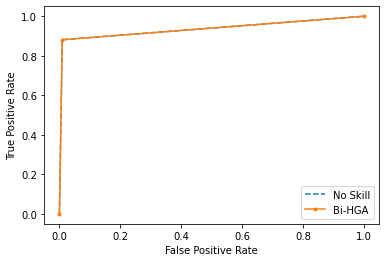

[0 0 0 ... 1 1 1]


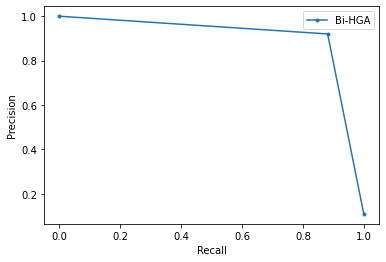

Epoch 1/20
191220/191220 [==============================] - 156s 816us/step - loss: 0.0514 - accuracy: 0.9780 - val_loss: 0.0937 - val_accuracy: 0.9656
Epoch 2/20
191220/191220 [==============================] - 157s 823us/step - loss: 0.0513 - accuracy: 0.9779 - val_loss: 0.0469 - val_accuracy: 0.9807
Epoch 3/20
191220/191220 [==============================] - 158s 828us/step - loss: 0.0512 - accuracy: 0.9779 - val_loss: 0.0578 - val_accuracy: 0.9736
Epoch 4/20
191220/191220 [==============================] - 158s 826us/step - loss: 0.0511 - accuracy: 0.9779 - val_loss: 0.0534 - val_accuracy: 0.9794
Epoch 5/20
191220/191220 [==============================] - 156s 815us/step - loss: 0.0510 - accuracy: 0.9780 - val_loss: 0.0646 - val_accuracy: 0.9722
Epoch 6/20
191220/191220 [==============================] - 161s 843us/step - loss: 0.0508 - accuracy: 0.9781 - val_loss: 0.0575 - val_accuracy: 0.9772
Epoch 7/20
191220/191220 [==============================] - 157s 822us/step - loss: 0.05

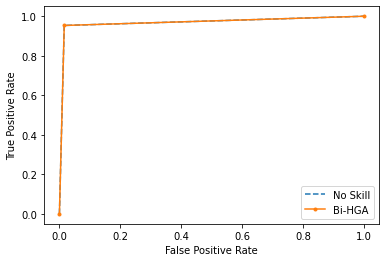

[0 0 0 ... 1 1 1]


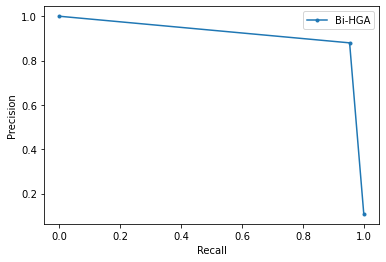

Cross Validation ROC - AUC = 0.9371109161282616
Cross Validation Precision recall curve - AUC = 0.8000579518641494
Cross Validation accuracy = 0.9753584414232261
Cross Validation f1 = 0.8867406507063237
Cross Validation precision = 0.8866765894619746
Cross Validation recall = 0.8881521545125127
Cross Validation fpr = [0.         0.01393032 1.        ]
Cross Validation tpr = [0.         0.88815215 1.        ]
Cross Validation lr_precision = [0.10914557 0.88667659 1.        ]
Cross Validation lr_recall = [1.         0.88815215 0.        ]


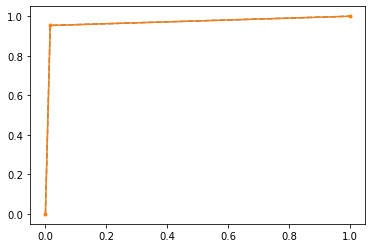

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from numpy import arange
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from matplotlib import pyplot 
from importlib import reload
reload(plt)
#from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


kf = KFold(n_splits=4,shuffle=True,random_state=None)

scores = []
aucs=0
aucs1=0
f1s=0
recalls=0
precisions=0
accuracys=0
lr_precisions=0
lr_recalls=0
fprs=0
tprs=0

for train_index, test_index in kf.split(X):
    x_train, x_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val))
    
    # make probability predictions with the model
    predictions = model.predict(x_val)
    # round predictions 
    predictions = [round(x[0]) for x in predictions]
    
   
    # make class predictions with the model
   # predictions1 =  model.predict>0.5.astype('int32')
    
    # evaluate the keras model
    _, accuracy = model.evaluate(X, y)
    print('overall Accuracy: %.2f' % (accuracy*100))
    
    print(confusion_matrix(y_val,predictions,labels=[1,0]))
    
    #No need for threshold setting since getting same value   
    accuracy=accuracy_score(y_val,predictions)
    print('accuracy: %f' % accuracy)
    
    f1=f1_score(y_val,predictions)
    print('f1 score: %f' % f1)    
    
    precision=precision_score(y_val,predictions)
    print('precision score: %f' % precision)
    
    recall=recall_score(y_val,predictions)
    print('recall score: %f' % recall)
    
    auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)    
    
    ns_auc = roc_auc_score(y_val, predictions)
    print('ROC AUC: %f' % auc)  
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    
    #https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=with%20sample%20code).-,ROC%20Curves%20and%20AUC%20in%20Python,probabilities%20for%20the%201%20class.
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
    fpr, tpr, _ = roc_curve(y_val, predictions)
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')

    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

    print(y_val)
    #https://www.kaggle.com/vedbharti/classification-precision-recall-vs-roc-plot
    auc1=average_precision_score(y_val, predictions)
     
    lr_precision, lr_recall, _ = precision_recall_curve(y_val, predictions)
    #lr_f1, lr_auc = f1_score(y_val, predictions1), auc(lr_recall, lr_precision)
    # summarize scores
    #print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    #no_skill = len(testy[testy==1]) / len(testy)
    #pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Bi-HGA')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    
    aucs += auc
    aucs1 += auc1
    accuracys += accuracy
    f1s += f1
    precisions += precision
    recalls += recall
    ns_fpr+=ns_fpr
    ns_tpr+=ns_tpr
    fprs+=fpr
    tprs+=tpr
    lr_recalls+=lr_recall
    lr_precisions+=lr_precision
print("Cross Validation ROC - AUC = {}".format(aucs/4))
print("Cross Validation Precision recall curve - AUC = {}".format(aucs1/4))
print("Cross Validation accuracy = {}".format(accuracys/4))
print("Cross Validation f1 = {}".format(f1s/4))
print("Cross Validation precision = {}".format(precisions/4))
print("Cross Validation recall = {}".format(recalls/4))
print("Cross Validation fpr = {}".format(fprs/4))
print("Cross Validation tpr = {}".format(tprs/4))
print("Cross Validation lr_precision = {}".format(lr_precisions/4))
print("Cross Validation lr_recall = {}".format(lr_recalls/4))

ns_fpr, ns_tpr, _ = roc_curve(y_val, predictions)
fpr, tpr, _ = roc_curve(y_val, predictions)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Bi-HGA')


In [13]:
end = datetime.datetime.now()

diff = (end - start)

datetime.timedelta(seconds=10, microseconds=885206)

diff_seconds = int(diff.total_seconds())

minute_seconds, seconds = divmod(diff_seconds, 60)
hours, minutes = divmod(minute_seconds, 60)
hms = f"{hours}h {minutes}m {seconds}s"

'0h 0m 10s'
print(hms) 

3h 33m 30s


In [14]:
#https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/#:~:text=Optimal%20Threshold%20for%20Precision%2DRecall%20Curve,-Unlike%20the%20ROC&text=Recall%20is%20calculated%20as%20the,positives%20and%20the%20false%20negatives.
#Optimal Threshold Tuning
# search thresholds for imbalanced classification
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# predict probabilities
#yhat = model.predict_proba(x_val)
# keep probabilities for the positive outcome only
#probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

NameError: name 'yhat_probs' is not defined

In [ ]:
# evaluate each threshold
scores = [accuracy_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Accuracy-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [precision_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, Precision-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
# evaluate each threshold
scores = [recall_score(y_val, to_labels(yhat_probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, recall-Score=%.5f' % (thresholds[ix], scores[ix]))

In [ ]:
from sklearn.metrics import roc_auc_score
# ROC AUC
auc = roc_auc_score(y_val, yhat_probs)
print('ROC AUC: %f' % auc)